In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

df = pd.read_csv("../data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: './data/clean_one_hot_data.csv'

In [ ]:
n_estimators = [10,25,50,100,150,200,250,500,750,1000]
max_features = ['auto','sqrt','log2']
max_depth = [None,10,20,30,40,50]
min_samples_split = [2,5,10,15,20]
min_samples_leaf = [1,2,5,10,15]

grid_param = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
             'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=42, class_weight = 'balanced')
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = grid_param, n_iter = 500,
                              cv=5, verbose=2, random_state=42, n_jobs=-1)

In [ ]:
y = df.attrition
X = df.drop('attrition',axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
print(rf_random.best_params_)

In [ ]:
best_params = {n_estimators = 50, min_samples_split= 5, 
               min_samples_leaf= 5, max_features= 'auto', 
               max_depth = 10}

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score

df = pd.read_csv("../data/clean_one_hot_emp_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

y = df.attrition
X = df.drop('attrition',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
scaler.fit_transform(X_train)

rf_optimal = RandomForestClassifier(n_estimators = 50, min_samples_split= 5, 
                                   min_samples_leaf= 5, max_features= 'auto', 
                                   max_depth = 10)

rf_optimal.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=50)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [7]:
y_pred = rf_optimal.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)*100} %")

The accuracy of the model is 87.2 %


In [8]:
train_probs = rf_optimal.predict_proba(X_train)[:,1] 
probs = rf_optimal.predict_proba(X_test)[:, 1]
train_predictions = rf_optimal.predict(X_train)

In [35]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.7391304347826086
Confusion Matrix: 
[[244  76]
 [ 20  28]]
Area Under Curve: 0.6729166666666666
Recall score: 0.5833333333333334


In [9]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 0.9819479939961868
Test ROC AUC  Score: 0.7348307291666666


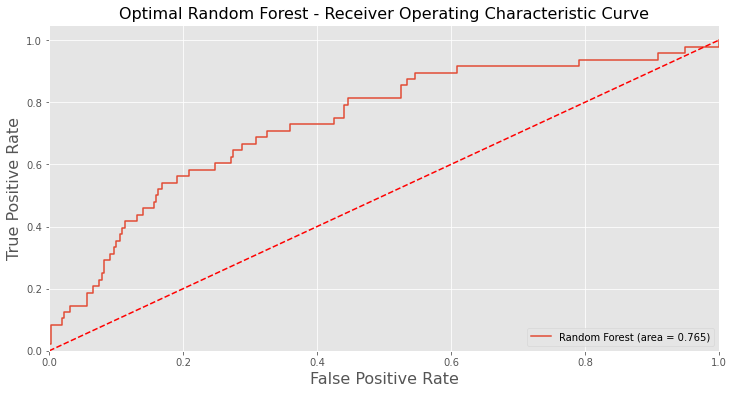

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

rf_optimal_auc = roc_auc_score(y_test, rf_optimal.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_optimal.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, label='Random Forest (area = 0.765)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Optimal Random Forest - Receiver Operating Characteristic Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [11]:
print(rf_optimal_auc)

0.5369791666666666


In [12]:

thresh_list = np.linspace(0,1,19)

In [13]:
print(thresh_list)

[0.         0.05555556 0.11111111 0.16666667 0.22222222 0.27777778
 0.33333333 0.38888889 0.44444444 0.5        0.55555556 0.61111111
 0.66666667 0.72222222 0.77777778 0.83333333 0.88888889 0.94444444
 1.        ]


In [14]:
import numpy as np
thresh_list_new = np.linspace(.05,1,20)

In [15]:
print(thresh_list_new)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]


In [16]:
cm_list = []
for i in thresh_list_new:
    y_pred = rf_optimal.predict_proba(X_test)[:, 1] > i
    print(confusion_matrix(y_test, y_pred))
    cm_list.append((confusion_matrix(y_test, y_pred)[0][1], confusion_matrix(y_test, y_pred)[1][0], confusion_matrix(y_test,y_pred)[1][1]))

[[ 45 275]
 [  3  45]]
[[147 173]
 [  6  42]]
[[204 116]
 [ 13  35]]
[[244  76]
 [ 20  28]]
[[272  48]
 [ 26  22]]
[[291  29]
 [ 33  15]]
[[303  17]
 [ 41   7]]
[[313   7]
 [ 42   6]]
[[316   4]
 [ 44   4]]
[[317   3]
 [ 44   4]]
[[319   1]
 [ 45   3]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 47   1]]
[[320   0]
 [ 48   0]]
[[320   0]
 [ 48   0]]
[[320   0]
 [ 48   0]]
[[320   0]
 [ 48   0]]
[[320   0]
 [ 48   0]]
[[320   0]
 [ 48   0]]
[[320   0]
 [ 48   0]]


In [17]:
# [[ 47 273]
#  [  2  46]]
print(cm_list)
# (tn, fp, fn, tp)

[(275, 3, 45), (173, 6, 42), (116, 13, 35), (76, 20, 28), (48, 26, 22), (29, 33, 15), (17, 41, 7), (7, 42, 6), (4, 44, 4), (3, 44, 4), (1, 45, 3), (0, 47, 1), (0, 47, 1), (0, 48, 0), (0, 48, 0), (0, 48, 0), (0, 48, 0), (0, 48, 0), (0, 48, 0), (0, 48, 0)]


In [28]:
profit_list = []
for i in range(len(cm_list)):
    profit = (cm_list[i][2]*-5000) + (cm_list[i][1]*-30000) + (cm_list[i][0]*-5000)
    profit_list.append(profit)

In [29]:
profit_list

[-1690000,
 -1255000,
 -1145000,
 -1120000,
 -1130000,
 -1210000,
 -1350000,
 -1325000,
 -1360000,
 -1355000,
 -1370000,
 -1415000,
 -1415000,
 -1440000,
 -1440000,
 -1440000,
 -1440000,
 -1440000,
 -1440000,
 -1440000]

In [20]:
profit_list = []
for i in range(len(cm_list)):
    profit = (cm_list[i][2]*-2500) + (cm_list[i][1]*-5000) + (cm_list[i][0]*-30000)
    profit_list.append(profit)

In [21]:
profit_list

[-8377500,
 -5325000,
 -3632500,
 -2450000,
 -1625000,
 -1072500,
 -732500,
 -435000,
 -350000,
 -320000,
 -262500,
 -237500,
 -237500,
 -240000,
 -240000,
 -240000,
 -240000,
 -240000,
 -240000,
 -240000]

In [30]:
results = zip(thresh_list_new, profit_list)

In [31]:
list(results)

[(0.05, -1690000),
 (0.1, -1255000),
 (0.15, -1145000),
 (0.2, -1120000),
 (0.25, -1130000),
 (0.3, -1210000),
 (0.35, -1350000),
 (0.39999999999999997, -1325000),
 (0.44999999999999996, -1360000),
 (0.49999999999999994, -1355000),
 (0.5499999999999999, -1370000),
 (0.6, -1415000),
 (0.65, -1415000),
 (0.7, -1440000),
 (0.75, -1440000),
 (0.7999999999999999, -1440000),
 (0.85, -1440000),
 (0.9, -1440000),
 (0.95, -1440000),
 (1.0, -1440000)]

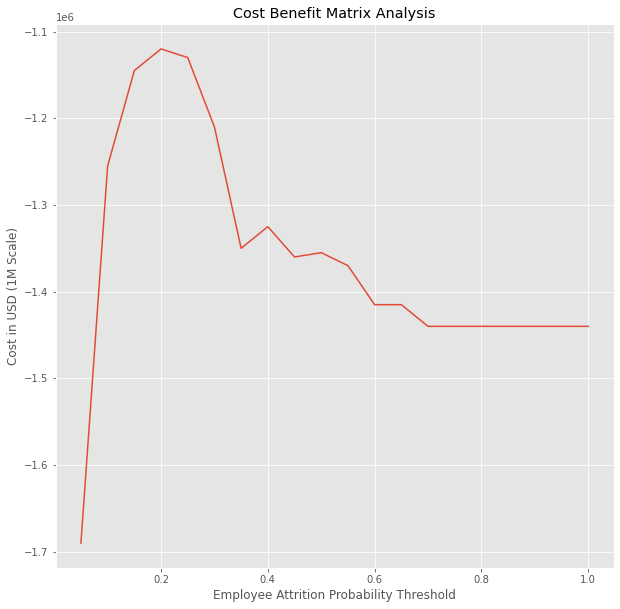

In [34]:
plt.style.use('ggplot')
# plt.rcParams.update({'Tomfont.size': 14})
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Cost Benefit Matrix Analysis")
ax.set_xlabel('Employee Attrition Probability Threshold')
ax.set_ylabel('Cost in USD (1M Scale)')
ax.plot(thresh_list_new, profit_list)
# ax.set_ylim(-8415000, -200000, 100000)
plt.show()

In [26]:
y_pred = rf_optimal.predict_proba(X_test)[:, 1] > .65
print(confusion_matrix(y_test, y_pred))

[[320   0]
 [ 47   1]]


In [27]:
y_pred = rf_optimal.predict_proba(X_test)[:, 1] > .5
print(confusion_matrix(y_test, y_pred))

[[317   3]
 [ 44   4]]


In [33]:
y_pred = rf_optimal.predict_proba(X_test)[:, 1] > .2
print(confusion_matrix(y_test, y_pred))
# (tn, fp, fn, tp)

[[244  76]
 [ 20  28]]
